In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from lightgbm import LGBMClassifier, early_stopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [2]:
market = pd.read_csv(r'E:\TRIPLETEN\marketing\marketing_and_product_performance.csv')
market.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [3]:
market.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


In [4]:
market.shape

(10000, 17)

In [5]:
market.columns

Index(['Campaign_ID', 'Product_ID', 'Budget', 'Clicks', 'Conversions',
       'Revenue_Generated', 'ROI', 'Customer_ID', 'Subscription_Tier',
       'Subscription_Length', 'Flash_Sale_ID', 'Discount_Level', 'Units_Sold',
       'Bundle_ID', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords'],
      dtype='object')

In [6]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  object 
 1   Product_ID                         10000 non-null  object 
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  object 
 8   Subscription_Tier                  10000 non-null  object 
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  object 
 11  Discount_Level                     10000 non-null  int6

In [7]:
cols_obj = market.select_dtypes(include='object').columns
mrkt = market[cols_obj]
mrkt

,Campaign_ID,Product_ID,Customer_ID,Subscription_Tier,Flash_Sale_ID,Bundle_ID,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,CUST_1K7G39,Premium,FLASH_1VFK5K,BNDL_29U6W5,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,CUST_0DWS6F,Premium,FLASH_1M6COK,BNDL_ULV60J,Innovative
2,CMP_6SBOWN,PROD_4V8A08,CUST_BR2GST,Basic,FLASH_J4PEON,BNDL_0HY0EF,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,CUST_6TBY6K,Premium,FLASH_1TOVXT,BNDL_AI09BC,Durable
4,CMP_AY0UTJ,PROD_F57N66,CUST_XASI45,Standard,FLASH_AOBHXL,BNDL_R03ITT,Affordable
...,...,...,...,...,...,...,...
9995,CMP_U1BQY9,PROD_F204EM,CUST_K3F0GA,Premium,FLASH_WOTOXI,BNDL_6DN251,Affordable
9996,CMP_ZQDI7T,PROD_5313XR,CUST_SY9H51,Standard,FLASH_3HIKX0,BNDL_24U1RG,Durable
9997,CMP_SYFTKH,PROD_44T74P,CUST_C6LMF4,Standard,FLASH_W3KMY9,BNDL_MIA2QO,Stylish
9998,CMP_FTAW8H,PROD_CPN4QT,CUST_URFVAQ,Basic,FLASH_L4UDXZ,BNDL_PHIE38,Affordable


In [8]:
mrkt['Customer_ID'].duplicated().value_counts()

Customer_ID
False    10000
Name: count, dtype: int64

In [9]:
mrkt_obj = mrkt[['Subscription_Tier','Common_Keywords']].value_counts().reset_index().sort_values(by='Subscription_Tier')
mrkt_obj

,Subscription_Tier,Common_Keywords,count
0,Basic,Affordable,864
1,Basic,Innovative,861
2,Basic,Stylish,851
6,Basic,Durable,840
4,Premium,Affordable,846
8,Premium,Stylish,827
9,Premium,Durable,822
10,Premium,Innovative,789
3,Standard,Affordable,849
5,Standard,Innovative,841


##### Campaign_ID = ID de Campaña
##### Product ID = ID de producto
##### Customer = Cliente
##### Suscription = Tipo de Suscripcion o membresia
##### Flash Sale = Promociones de descuentos en productos, venta rapida
##### Bundle_ID = Id de paquetes vendidos
##### Common Keywords =  Palabras clave mas comunes (Asequible Elegante Innovador y Duradero)

In [10]:
cols_int = market.select_dtypes(include='int64').columns
mrkt_int = market[cols_int]
mrkt_int.head(2)

,Clicks,Conversions,Subscription_Length,Discount_Level,Units_Sold,Customer_Satisfaction_Post_Refund
0,4946,73,4,43,34,4
1,570,510,4,28,97,2


##### Conversions = cumplimiento de objetivos especificos por parte de los usuarios, conversiones satisfactorias por parte de los usuarios en las campañas, dependiendo la variable, compras, descargas
##### Clicks = cantidad de clicks generados durante la campaña
##### Subscription Length = Periodo de suscripcion en meses de 1 a 36
##### Discount Level = Porcentaje de Descuento de 10 a 70%
##### units Sold = Unidades vendidas
##### Customer_Satisfaction_Post_Refund = Calificaciones de satisfaccion despues de reembolso 1 al 5

##### con las conversiones y el numero de clicks se puede obtener el CR o Tasa de Conversion, Conversion Rate =  Conversiones / Clics * 100

In [11]:
cols_float = market.select_dtypes(include='float64').columns
mrkt_float = market[cols_float]
mrkt_float.head(2)

,Budget,Revenue_Generated,ROI,Bundle_Price
0,41770.45,15520.09,1.94,433.80
1,29900.93,30866.17,0.76,289.29


##### Budget= Presupuesto de campaña en dls (entre 500 y 50,000)
##### Revenue_generated = Ingresos Generados
##### ROI = Retorno de Inversion (proporcion/ratio de ingresos sobre presupuesto)
##### Bundle Price = Precio por paquete

### GRAFICOS

In [12]:
mrkt_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription_Tier  12 non-null     object
 1   Common_Keywords    12 non-null     object
 2   count              12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 384.0+ bytes


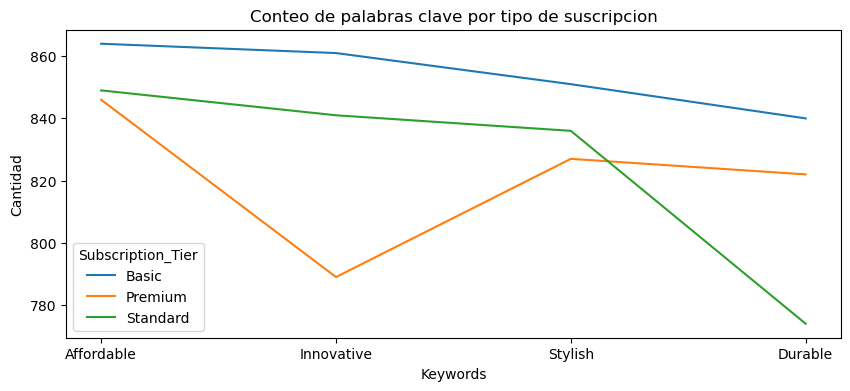

In [13]:
plt.figure(figsize=(10,4))
sns.lineplot(data = mrkt_obj, x='Common_Keywords', y='count', hue='Subscription_Tier')
plt.title('Conteo de palabras clave por tipo de suscripcion')
plt.xlabel('Keywords')
plt.ylabel('Cantidad')
plt.show()

In [14]:
mrkt_int[['Clicks','Conversions','Subscription_Length','Discount_Level','Units_Sold']].value_counts().reset_index().sort_values(by='Clicks', ascending=False)

,Clicks,Conversions,Subscription_Length,Discount_Level,Units_Sold,count
9999,4999,714,20,18,192,1
3339,4998,985,27,13,55,1
3338,4998,194,22,52,24,1
3337,4997,848,6,36,179,1
3336,4997,836,30,45,9,1
...,...,...,...,...,...,...
6666,12,476,18,41,124,1
6665,11,345,4,48,154,1
6664,11,112,26,40,194,1
313,10,384,13,43,9,1


In [15]:
mrkt_int['CR'] = (mrkt_int['Conversions']/mrkt_int['Clicks'])*100
mrkt_int.groupby('Discount_Level')['CR'].mean().reset_index().sort_values(by='CR', ascending=False).head()

C:\Users\dell\AppData\Local\Temp\ipykernel_30492\1437805453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrkt_int['CR'] = (mrkt_int['Conversions']/mrkt_int['Clicks'])*100


,Discount_Level,CR
2,12,101.674376
11,21,97.662746
45,55,90.469601
23,33,89.703253
31,41,88.529270


In [16]:
categorias = []
for valor in mrkt_int['Discount_Level']:
    if valor <= 33.99:
        categorias.append('Low')
    elif valor > 33.99 and valor <= 65.99:
        categorias.append('Medium')
    elif valor >=101:
        categorias.append('atipico')
    else:
        categorias.append('High')
mrkt_int['Discount_category'] = categorias

C:\Users\dell\AppData\Local\Temp\ipykernel_30492\132954941.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrkt_int['Discount_category'] = categorias


In [17]:
#Categorizamos por niveles de descuento en bajo, medio, alto
mrkt_int

,Clicks,Conversions,Subscription_Length,Discount_Level,Units_Sold,Customer_Satisfaction_Post_Refund,CR,Discount_category
0,4946,73,4,43,34,4,1.475940,Medium
1,570,510,4,28,97,2,89.473684,Low
2,3546,265,9,51,160,4,7.473209,Medium
3,2573,781,32,36,159,1,30.353673,Medium
4,818,79,29,20,52,2,9.657702,Low
...,...,...,...,...,...,...,...,...
9995,25,720,18,25,95,3,2880.000000,Low
9996,3503,799,18,10,5,2,22.809021,Low
9997,1140,428,19,37,191,3,37.543860,Medium
9998,1078,409,31,59,73,4,37.940631,Medium


In [18]:
#Los clientes que tienen un indice mayor de 100%
CR_atipicos = mrkt_int[mrkt_int['CR']>100].count()
CR_atipicos

Clicks                               959
Conversions                          959
Subscription_Length                  959
Discount_Level                       959
Units_Sold                           959
Customer_Satisfaction_Post_Refund    959
CR                                   959
Discount_category                    959
dtype: int64

In [19]:
#Graficar sin valores atipicos, quitar los que son valores mayores de 100%, estos puede estar provocando cambios

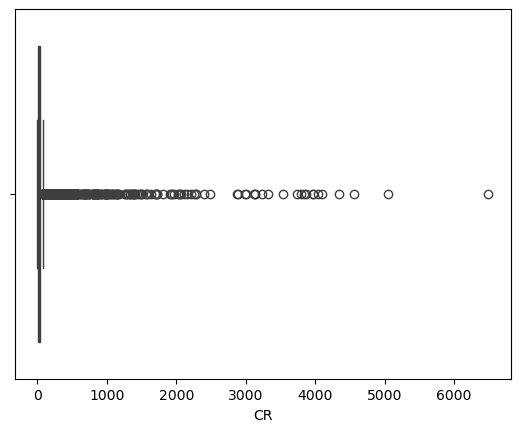

In [20]:
#Graficamos grafica de cajas para conocer los valores atipicos y conocerlos
sns.boxplot(x=mrkt_int['CR'])
plt.show()

In [21]:
#Mostramos los valores atipicos que puede contener el dataset
Q1 = mrkt_int['CR'].quantile(0.25)
Q3 = mrkt_int['CR'].quantile(0.75)
IQR = Q3 - Q1
outliers = mrkt_int[(mrkt_int['CR']<Q1 - 1.5 * IQR) | (mrkt_int['CR']> Q3 + 1.5 * IQR)]
outliers['CR'].sort_values()

5714      85.363636
8595      85.428907
8491      85.479798
3559      85.561497
4661      85.776488
           ...     
2711    4105.263158
603     4341.176471
563     4557.894737
6193    5046.153846
2691    6493.333333
Name: CR, Length: 1151, dtype: float64

In [22]:
mrkt_int.describe()

,Clicks,Conversions,Subscription_Length,Discount_Level,Units_Sold,Customer_Satisfaction_Post_Refund,CR
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2481.903600,498.978700,18.016500,39.421000,100.689600,2.500900,60.975800
std,1435.973623,289.479495,10.149666,17.212925,57.074015,1.113249,232.229246
min,10.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.020412
25%,1225.750000,247.000000,9.000000,24.000000,52.000000,2.000000,9.983393
50%,2451.000000,499.000000,18.000000,39.000000,101.000000,2.000000,20.198993
75%,3723.000000,751.000000,27.000000,54.000000,150.000000,3.000000,40.115026
max,4999.000000,999.000000,35.000000,69.000000,199.000000,4.000000,6493.333333


In [23]:
#Excluimos los valores mayores a 100% obtenidos en CR, pueden ser considerados valores atipicos, por la cantidad de clicks por cada usuario
CR_ordenado = (mrkt_int[mrkt_int['CR']<101].groupby('Discount_category')['CR'].count().reset_index().sort_values(by='CR', ascending=False))
CR_ordenado

,Discount_category,CR
2,Medium,4843
1,Low,3588
0,High,613


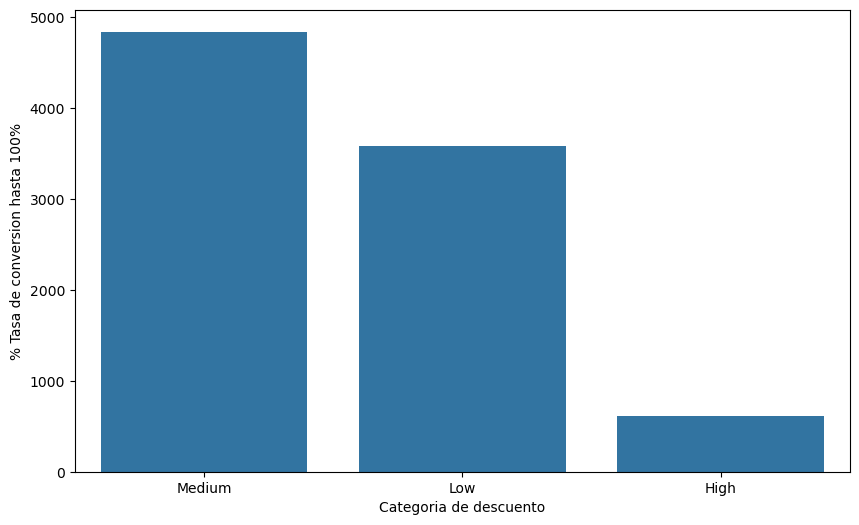

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data = CR_ordenado, x='Discount_category', y='CR')
plt.xlabel('Categoria de descuento')
plt.ylabel('% Tasa de conversion hasta 100%')
plt.show()

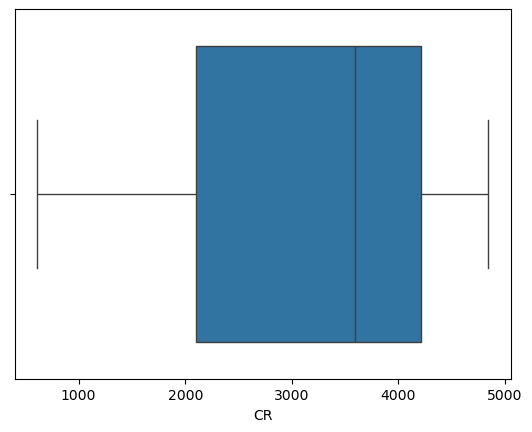

In [25]:
sns.boxplot(x=CR_ordenado['CR'])
plt.show()

In [26]:
Q1 = CR_ordenado['CR'].quantile(0.25)
Q3 = CR_ordenado['CR'].quantile(0.75)
IQR = Q3 - Q1
outliers = CR_ordenado[(CR_ordenado['CR']<Q1 - 1.5 * IQR) | (CR_ordenado['CR']> Q3 + 1.5 * IQR)]
outliers['CR'].sort_values()

Series([], Name: CR, dtype: int64)

In [27]:
#Identificar valores atipicos, pero primero identificar los valores mayores de 100

Lo valores arrojados por la tasa de conversion, nos indican que existen varios usuarios, que por el simple hecho de dar click antes de comprar, estos son considerados, es por ello que estos valores se disparan a tal grado que rebasan por mucho el indice del 100%, esto podria afectar de forma directa la medicion final al compararlos con la tendencia que tienen y al tratar de entender el comportamiento de los clientes referente a las promociones. Se observa que en su mayoria, los descuentos que mas impacto tienen son de entre 33 y 66%, concentrandose ahi la mayor parte de los clientes respecto al nivel de descuentos

In [28]:
#Ahora hay que ver el nivel de descuento que corresponde a esos excedentes de los valores atipicos, para tratar de entender el porque de los clicks
atipicos = mrkt_int.loc[mrkt_int['CR']>100,['CR', 'Clicks','Discount_Level']]
atipicos.groupby(['Clicks','Discount_Level'])['CR'].sum().reset_index().sort_values(by='Clicks', ascending=False)

,Clicks,Discount_Level,CR
946,971,10,102.059732
945,931,11,104.296455
944,928,44,107.327586
943,920,45,103.369565
942,910,18,103.626374
...,...,...,...
5,12,41,3966.666667
2,11,40,1018.181818
3,11,48,3136.363636
1,10,43,3840.000000


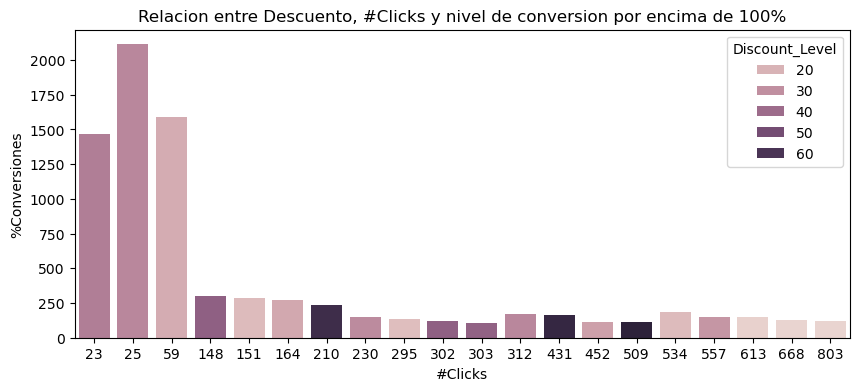

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(data = atipicos.head(20), x='Clicks', y='CR', hue='Discount_Level')
plt.title('Relacion entre Descuento, #Clicks y nivel de conversion por encima de 100%')
plt.xlabel('#Clicks')
plt.ylabel('%Conversiones')
plt.show()

Intentamos ver a traves de los datos, si existia como tal una relacion entre la tasa de conversion, el numero de clicks efectuados por los usuarios y el nivel de descuento, todo esto sobre los valores que se arrojaron como atipicos (959) sin embargo, no se ve una relacion clara ni una tendencia real hacia ningun lado, por tanto, podemos inferir que la fuente de los datos pudo tener algun error en la recoleccion de los mismos o se pudo deber a un fallo en la conversion traducida desde la pagina y como esta los este almacenando, sin embargo, no hay forma de saberlo, ya que es un proyecto de prueba y no conocemos el origen de la adquisicion de los datos

### Analisis

In [30]:
market.columns

Index(['Campaign_ID', 'Product_ID', 'Budget', 'Clicks', 'Conversions',
       'Revenue_Generated', 'ROI', 'Customer_ID', 'Subscription_Tier',
       'Subscription_Length', 'Flash_Sale_ID', 'Discount_Level', 'Units_Sold',
       'Bundle_ID', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords'],
      dtype='object')

In [31]:
#Agregamos columna CR donde calculamos la Tasa de Conversion (Clicks/Conversiones Totales)
market_filtrado = market[['Budget', 'Clicks', 'Conversions',
       'Revenue_Generated', 'ROI', 'Subscription_Tier',
       'Subscription_Length', 'Discount_Level', 'Units_Sold',
       'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords']]
market_filtrado['CR'] = ((market_filtrado['Conversions']/market_filtrado['Clicks'])*100).round(2)
market_filtrado

C:\Users\dell\AppData\Local\Temp\ipykernel_30492\771636292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_filtrado['CR'] = ((market_filtrado['Conversions']/market_filtrado['Clicks'])*100).round(2)


,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Tier,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,CR
0,41770.45,4946,73,15520.09,1.94,Premium,4,43,34,433.80,4,Affordable,1.48
1,29900.93,570,510,30866.17,0.76,Premium,4,28,97,289.29,2,Innovative,89.47
2,22367.45,3546,265,32585.62,1.41,Basic,9,51,160,462.87,4,Affordable,7.47
3,29957.54,2573,781,95740.12,3.32,Premium,32,36,159,334.16,1,Durable,30.35
4,36277.19,818,79,81990.43,3.53,Standard,29,20,52,371.67,2,Affordable,9.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49183.07,25,720,95399.69,4.61,Premium,18,25,95,196.59,3,Affordable,2880.00
9996,38519.59,3503,799,38999.04,3.31,Standard,18,10,5,461.12,2,Durable,22.81
9997,21532.92,1140,428,39646.56,5.00,Standard,19,37,191,248.20,3,Stylish,37.54
9998,35546.54,1078,409,6785.63,4.08,Basic,31,59,73,217.78,4,Affordable,37.94


In [32]:
#Filtramos los valores que encontramos con CR menores a 100%
#Eliminamos los valores atipicos detectados en la columna de CR
df_depurado = market_filtrado.loc[market_filtrado['CR']<100]
#NO Aplicamos OHE, para evitar confusion con el algoritmo Kmeans
#X = pd.get_dummies(df_depurado, drop_first=True)
df_depurado

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Tier,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,CR
0,41770.45,4946,73,15520.09,1.94,Premium,4,43,34,433.80,4,Affordable,1.48
1,29900.93,570,510,30866.17,0.76,Premium,4,28,97,289.29,2,Innovative,89.47
2,22367.45,3546,265,32585.62,1.41,Basic,9,51,160,462.87,4,Affordable,7.47
3,29957.54,2573,781,95740.12,3.32,Premium,32,36,159,334.16,1,Durable,30.35
4,36277.19,818,79,81990.43,3.53,Standard,29,20,52,371.67,2,Affordable,9.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,24158.52,3230,959,79903.52,4.12,Premium,27,55,27,344.87,4,Durable,29.69
9996,38519.59,3503,799,38999.04,3.31,Standard,18,10,5,461.12,2,Durable,22.81
9997,21532.92,1140,428,39646.56,5.00,Standard,19,37,191,248.20,3,Stylish,37.54
9998,35546.54,1078,409,6785.63,4.08,Basic,31,59,73,217.78,4,Affordable,37.94


In [33]:
#Preprocesamos con MinMaxScaler, ajustamos los valores a la misma escala para evitar que haya distorsion en el modelado
cols = ['Units_Sold','Bundle_Price']
df_num = df_depurado[cols]
scaler = MinMaxScaler()
clientes = pd.DataFrame(scaler.fit_transform(df_num), columns=cols)
clientes.head(2)

,Units_Sold,Bundle_Price
0,0.166667,0.852942
1,0.484848,0.531781


In [34]:
#Aplicamos Kmeans para saber cuantos clusters vamos a crear, parametro n_clusters, se colocan los clusters como valores, el resultado en sklearn, 
#se colocan con un guion
#La inercia
kmeans = KMeans(n_clusters = 4).fit(clientes.values)
clientes['cluster'] = kmeans.labels_
#Numero de centroides y inertia que tan bien estan conformados los clusters
print(kmeans.cluster_centers_,kmeans.inertia_)

[[0.75218653 0.7598837 ]
 [0.25671223 0.25109457]
 [0.25401872 0.75056017]
 [0.75716497 0.26313666]] 375.66482881188233


In [35]:
clientes['cluster'].value_counts()

cluster
3    2332
1    2280
2    2262
0    2164
Name: count, dtype: int64

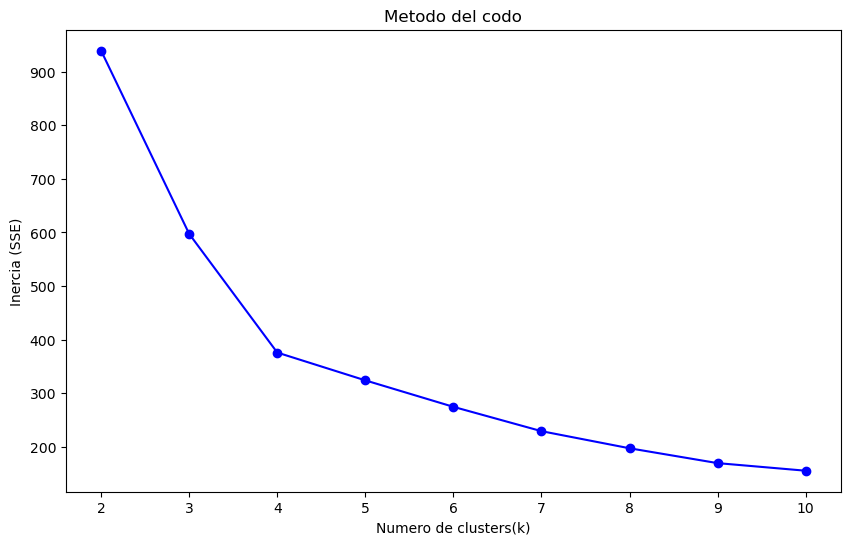

In [36]:
#Aplicamos el metodo del codo para conocer la cantidad optima de clusters a utilizar, con esta metrica se pretende ver donde se da
#el punto de inflexion, lo que nos indicara el numero optimo de clusters para entrenar el modelo KMeans
inertia = []
K = range(2,11) #probar entre 2 y 10 clusters
for k in K:
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clientes.drop('cluster', axis=1).values)#usa solo las variables originales
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K,inertia, 'bo-')
plt.xlabel('Numero de clusters(k)')
plt.ylabel('Inercia (SSE)')
plt.title('Metodo del codo')
plt.show()

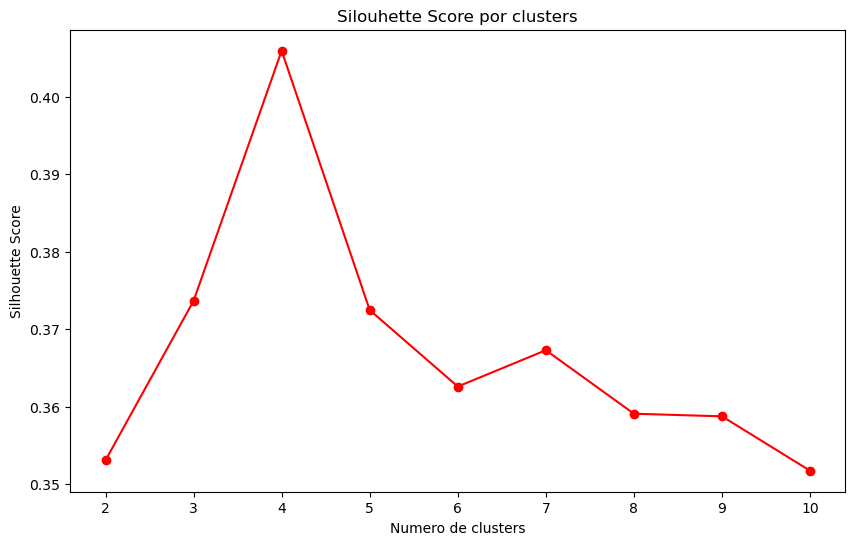

In [37]:
#Aplicamos Silhouette Score, para verificar que realmente no esten sobre cargados los clusters definidos por el metodo del codo
silhouette_scores = []
K=range(2,11)
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(clientes.drop('cluster', axis=1).values)
    score=silhouette_score(clientes.drop('cluster', axis=1).values,labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(K, silhouette_scores,'ro-')
plt.xlabel('Numero de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silouhette Score por clusters')
plt.show()

C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\dell\a

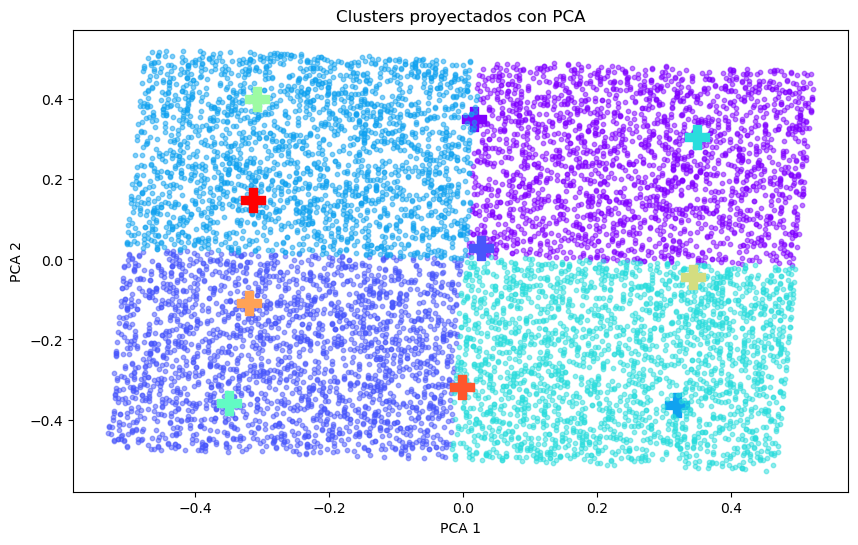

In [38]:
# Aplicamos PCA para graficar despues de confirmar la cantidad de clusters optimos con Metodo del codo y Silhouette Score, no importa la cantidad de
# centroides observados en la grafica, ya que el hecho de que no coincidan con la cantidad optima de clusters a aplicar, no es un indicio que 
# no es correcta la medicion
pca = PCA(n_components=2)
clientes_pca = pca.fit_transform(clientes.drop('cluster', axis=1))
plt.figure(figsize=(10,6))
colores = cm.rainbow(np.linspace(0,1,kmeans.n_clusters))
for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes_pca[clientes['cluster']==cluster,0],
               clientes_pca[clientes['cluster']==cluster,1],
               marker='o',s=10,color=colores[cluster], alpha=0.5)
    plt.scatter(pca.transform(kmeans.cluster_centers_)[cluster,0],
               pca.transform(kmeans.cluster_centers_)[cluster,1],
               marker='P',s=280, color=colores[cluster])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters proyectados con PCA')
plt.show()

In [39]:
clientes[['Revenue_Generated','Budget']] = df_depurado[['Revenue_Generated','Budget']]
clientes.head(2)

,Units_Sold,Bundle_Price,cluster,Revenue_Generated,Budget
0,0.166667,0.852942,2,15520.09,41770.45
1,0.484848,0.531781,2,30866.17,29900.93


In [40]:
#Agrupamos por cluster para saber cuales son mas rentables, utilizando los promedios de cada variable
cluster_conveniente = clientes.groupby('cluster')[['Units_Sold','Revenue_Generated']].mean()
cluster_conveniente.sort_values(by='Revenue_Generated', ascending=False)

,Units_Sold,Revenue_Generated
cluster,,
0,0.752913,50625.123731
2,0.254506,50373.049681
1,0.256437,49802.460726
3,0.756725,49461.658771


In [41]:
#Separamos en una tabla por grupos para saber cuales son los que tienen una mayor rentabilidad
rentabilidad = clientes.groupby('cluster').agg({'Units_Sold':['mean', 'sum'],
                                               'Revenue_Generated':['mean','sum'], 
                                                'Budget':['mean','sum'],
                                               'cluster':'count'})
rentabilidad.columns = ['Units_Promedio','Units_Total','Revenue_Promedio','Revenue_Total','Budget_Promedio','Budget_Total','Total_clientes']

In [42]:
rentabilidad.sort_values(by='Revenue_Total',ascending=False)

,Units_Promedio,Units_Total,Revenue_Promedio,Revenue_Total,Budget_Promedio,Budget_Total,Total_clientes
cluster,,,,,,,
2,0.254506,575.691919,50373.049681,1.042722e+08,25536.683106,52860934.03,2262
3,0.756725,1764.681818,49461.658771,1.042652e+08,25328.332955,53392125.87,2332
1,0.256437,584.676768,49802.460726,1.021946e+08,25275.906009,51866159.13,2280
0,0.752913,1629.303030,50625.123731,9.836462e+07,25054.193541,48680298.05,2164


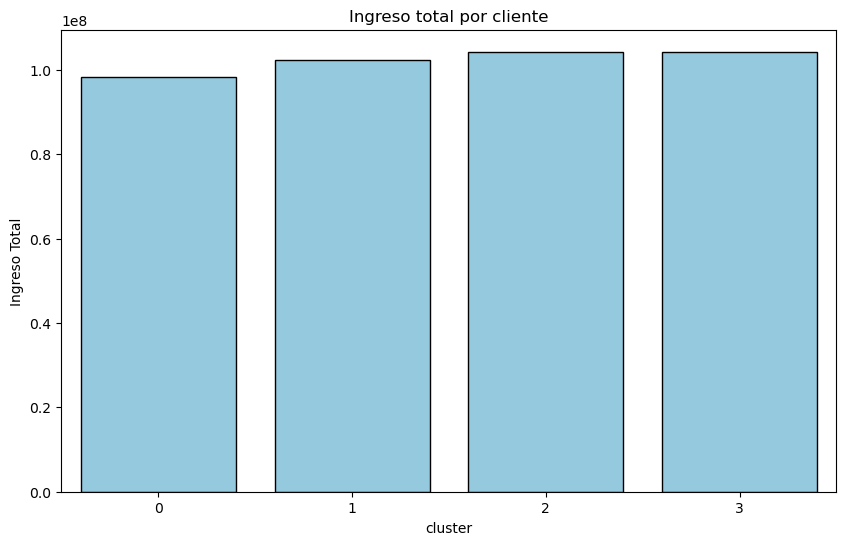

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=rentabilidad, x='cluster',y='Revenue_Total', edgecolor='black', color='skyblue')
plt.xlabel('cluster')
plt.ylabel('Ingreso Total')
plt.title('Ingreso total por cliente')
plt.show()

Se aplico el algoritmo Kmeans, con el objetivo de segmentar a los clientes para conocer los grupos que muestran un mayor ingreso con menor cantidad de clientes y unidades, este grupo corresponde al segmento del cluster 0, los cuales podriamos considerar como los clientes premium, en cambio el segmento correspondiente al cluster 1, se encuentra la mayor cantidad de clientes y un mayor numero de unidades vendidas, considerariamos a este segmento como el de los clientes a los cuales se les podrian ofrecer promociones variadas y productos en paquete sin sacrificar la utilidad el negocio. Cabe mencionar que la diferencia entre ambos grupos es minima, sin embargo, esto nos permite tener un panorama sobre el comportamiento de los clientes y con ello se puede realizar un analisis predictivo si consideramos algunos factores como si cambiamos los montos de inversion para conocer el impacto que esto tendria si asi se requiere.

#### MODELOS PREDICTIVOS

LightGBM, nos sirve para predecir ambos modelos (Clasificacion y regresion), ya que ocupa menos memoria y es mas eficiente ya que no se necesita OHE
Empleamos el modelo predictivo LightGBM para predecir desercion de clientes Target: churn(Clasificacion)
Empleamos con el mismo modelo, para predecir los ingresos que perderia la empresa al perder a los clientes basados en Ingresos Generados (Regresion)

In [44]:
df_depurado

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Tier,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,CR
0,41770.45,4946,73,15520.09,1.94,Premium,4,43,34,433.80,4,Affordable,1.48
1,29900.93,570,510,30866.17,0.76,Premium,4,28,97,289.29,2,Innovative,89.47
2,22367.45,3546,265,32585.62,1.41,Basic,9,51,160,462.87,4,Affordable,7.47
3,29957.54,2573,781,95740.12,3.32,Premium,32,36,159,334.16,1,Durable,30.35
4,36277.19,818,79,81990.43,3.53,Standard,29,20,52,371.67,2,Affordable,9.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,24158.52,3230,959,79903.52,4.12,Premium,27,55,27,344.87,4,Durable,29.69
9996,38519.59,3503,799,38999.04,3.31,Standard,18,10,5,461.12,2,Durable,22.81
9997,21532.92,1140,428,39646.56,5.00,Standard,19,37,191,248.20,3,Stylish,37.54
9998,35546.54,1078,409,6785.63,4.08,Basic,31,59,73,217.78,4,Affordable,37.94


In [45]:
df_depurado.columns

Index(['Budget', 'Clicks', 'Conversions', 'Revenue_Generated', 'ROI',
       'Subscription_Tier', 'Subscription_Length', 'Discount_Level',
       'Units_Sold', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords', 'CR'],
      dtype='object')

In [46]:
df_depurado.shape

(9038, 13)

In [47]:
df_depurado['churn'] = df_depurado.apply(lambda row: 1 if (row['Subscription_Length']<12 and row['ROI']<1) else 0, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_30492\475725053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depurado['churn'] = df_depurado.apply(lambda row: 1 if (row['Subscription_Length']<12 and row['ROI']<1) else 0, axis=1)


In [48]:
df_depurado['churn'].value_counts()

churn
0    8720
1     318
Name: count, dtype: int64

In [49]:
ROI = df_depurado['ROI'].min()
ROI

0.5

In [50]:
df_depurado['Conversions'].min()

1

In [51]:
df_depurado['churn'].value_counts(normalize=True)

churn
0    0.964815
1    0.035185
Name: proportion, dtype: float64

In [52]:
# Variables predictoras y objetivo
x = df_depurado.drop(['churn'], axis=1)
y = df_depurado['churn']

#Convertir a categoricas
x['Subscription_Tier']=x['Subscription_Tier'].astype('category')
x['Common_Keywords']=x['Common_Keywords'].astype('category')

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Parámetros
model = LGBMClassifier(
    objective='binary',
    boosting_type = 'gbdt',
    num_leaves = 31,
    learning_rate = 0.05,
    n_estimators=100,
    is_unbalance=True,
    random_state=42)

# Entrenar modelo
model.fit(x_train, y_train, 
          eval_set=[(x_test, y_test)],
          eval_metric='binary_error', 
          callbacks = [early_stopping(10)])

# Predicciones
y_pred_binary = model.predict(x_test)
print("F1 Score:", f1_score(y_test, y_pred_binary))
print('AUC_ROC', roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))

[LightGBM] [Info] Number of positive: 237, number of negative: 6089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2086
[LightGBM] [Info] Number of data points in the train set: 6326, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.037464 -> initscore=-3.246179
[LightGBM] [Info] Start training from score -3.246179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

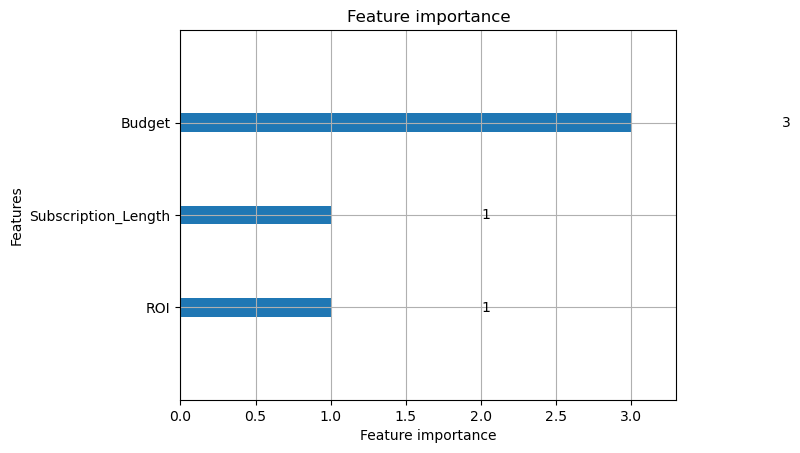

In [53]:
import matplotlib.pyplot as plt
lgb.plot_importance(model, max_num_features=10)
plt.show()

Al aplicar este modelo LGBM, podemos ver que, segun las metricas, es un modelo que predice de forma adecuada los valores, identificando cada uno de ellos por separado, obteniendo una buena estimacion de los resultados, sin embargo, al ser un dataset que no cuenta con registros historicos, en los cuales nos podamos basar para obtener un registro real sobre la tasa de desercion de clientes (churn), si no que solo se usaron datos como prueba intentando analizar un pronostico sobre la misma desercion, estos datos fueron basados considerando el tiempo que llevan los clientes con el servicio vs retorno de inversion, considerando otras variables
En conclusion, este modelo, es meramente representativo, ademas de utilizarlo como referencia ya que utiliza menor espacio y memoria y maneja altos niveles de precision en sus metricas. Cabe mencionar que los valores utilizados fueron solo representativos, no son valores reales.

### Regresion Logistica

In [54]:
df_depurado.head(2)

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Tier,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords,CR,churn
0,41770.45,4946,73,15520.09,1.94,Premium,4,43,34,433.80,4,Affordable,1.48,0
1,29900.93,570,510,30866.17,0.76,Premium,4,28,97,289.29,2,Innovative,89.47,1


In [55]:
#Aplicamos OHE a columnas categoricas
prediccion = pd.get_dummies(df_depurado,columns=['Subscription_Tier','Common_Keywords'], drop_first=True)
prediccion.head(2)

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund,CR,churn,Subscription_Tier_Premium,Subscription_Tier_Standard,Common_Keywords_Durable,Common_Keywords_Innovative,Common_Keywords_Stylish
0,41770.45,4946,73,15520.09,1.94,4,43,34,433.80,4,1.48,0,True,False,False,False,False
1,29900.93,570,510,30866.17,0.76,4,28,97,289.29,2,89.47,1,True,False,False,True,False


In [56]:
prediccion['churn'].value_counts()

churn
0    8720
1     318
Name: count, dtype: int64

In [57]:
x = prediccion.drop('churn', axis=1)
y = prediccion['churn']

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight = 'balanced')
log_reg.fit(x_train, y_train)

# Predicciones
y_pred = log_reg.predict(x_test)
y_prob = log_reg.predict_proba(x_test)[:,1]  # probabilidades clase 1

# Evaluación
print(classification_report(y_test, y_pred)) #se puede ver precision, recall y f1 score
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      2631
           1       0.18      0.90      0.30        81

    accuracy                           0.88      2712
   macro avg       0.59      0.89      0.62      2712
weighted avg       0.97      0.88      0.91      2712

ROC-AUC: 0.9549108211213875


C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


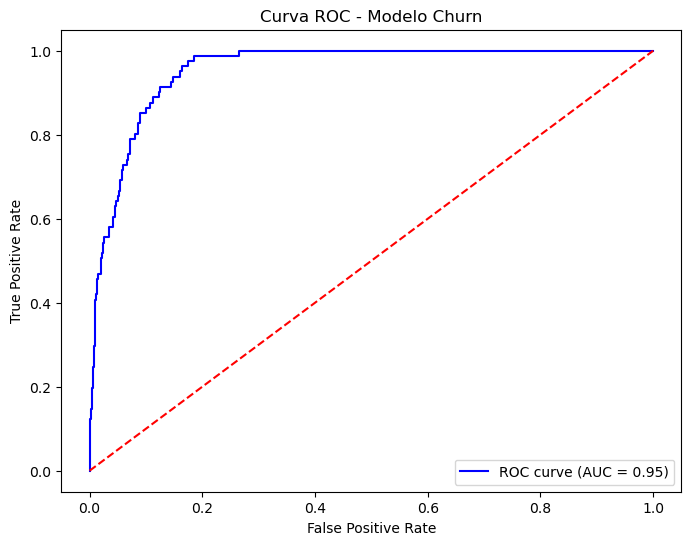

In [58]:
#Curva ROC_AUC
#Probabilidades de la clase positiva 1
y_prob = log_reg.predict_proba(x_test)[:,1]

fpr,tpr, thresholds = roc_curve(y_test, y_prob)

auc_value = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6)) 
plt.plot(fpr,tpr, color='blue', label=f'ROC curve (AUC = {auc_value:.2f})') 
plt.plot([0,1], [0,1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Curva ROC - Modelo Churn') 
plt.legend(loc="lower right") 
plt.show()

Este modelo, nos indica que con base en estos resultados como el AUC ROC, con este modelo se mantiene una buena separacion de las clases 
Clase 0 activos, Clase 1 churn
El modelo detecto de forma optima con un 100% de precision los clientes que estan activos (lo cual hay que recordar es con fines demostrativos ya que no se cuenta con valores reales y no hay forma de conseguirlos)
Detecto Un recall de clientes activos del 88%
f1 score, detecto un 93% de balance entre precision y recall
se encontraron 2631 clientes activos en el conjunto de prueba
Se puede observar que al verificar los posibles desertores, el modelo solo encontro un 18% que realmente lo eran y f1 score de 30% de balance entre precision y recall, el cual es muy bajo.
En conclusion, el modelo es bueno para detectar clientes activos, sin embargo, deja mucho que desear, por lo menos con estos datos, el nivel de prediccion de los desertores, mostrando valores apenas del 18 y 30%, recordemos que esto, puede deberse en su mayoria al origen de los datos asi como el calculo de los mismos (churn)
Para mejorar el resultado, eun ejemplo real, podriamos nutrir el dataset con valores que aporten en cuanto a informacion sobre frecuencia de compra y fechas de duracion de contratos, con esto podemos afinar las metricas y utilizar scale pos weight para balancear mejor las clases.
De forma general observamos que el resultado obtenido en ROC_AUC fue de 95%, con esto podemos ver la capacidad discriminativa del modelo, bastante elevado para ser valores de prueba.